# NLP Task 1: Artur Xarles & Enric Azuara - Reproduce_results notebook

We first read all the packages required as well as the different functions and classes created to implement the different approaches.

In [1]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd
from utils import *
import sklearn
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("quora_train_data.csv")
A_df, test_df = sklearn.model_selection.train_test_split(train_df, test_size=0.05, random_state=123)
train_df, val_df = sklearn.model_selection.train_test_split(A_df, test_size=0.05, random_state=123)

## Load sets with different features

First of all, we will read the different features created. In this case we have features such as the ones obtained through count vectorizer and TF-IDF. Moreover, these approaches have been also implemented using lemmatization and stemming so we also read these features. Finally, a set of extra features containing different information about the questions.

In [3]:
#CV
q1_train_count = scipy.sparse.load_npz('./data/CV_train_q1.npz')
q2_train_count = scipy.sparse.load_npz('./data/CV_train_q2.npz')
q1_val_count = scipy.sparse.load_npz('./data/CV_val_q1.npz')
q2_val_count = scipy.sparse.load_npz('./data/CV_val_q2.npz')
#TF-IDF
q1_train_tfidf = scipy.sparse.load_npz('./data/tfidf_train_q1.npz')
q2_train_tfidf = scipy.sparse.load_npz('./data/tfidf_train_q2.npz')
q1_val_tfidf = scipy.sparse.load_npz('./data/tfidf_val_q1.npz')
q2_val_tfidf = scipy.sparse.load_npz('./data/tfidf_val_q2.npz')
#CV lemmatization
q1_train_count_lem = scipy.sparse.load_npz('./data/CV_lem_train_q1.npz')
q2_train_count_lem = scipy.sparse.load_npz('./data/CV_lem_train_q2.npz')
q1_val_count_lem = scipy.sparse.load_npz('./data/CV_lem_val_q1.npz')
q2_val_count_lem = scipy.sparse.load_npz('./data/CV_lem_val_q2.npz')
#TF-IDF lemmatization
q1_train_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_train_q1.npz')
q2_train_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_train_q2.npz')
q1_val_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_val_q1.npz')
q2_val_tfidf_lem = scipy.sparse.load_npz('./data/tfidf_lem_val_q2.npz')
#CV stemming
q1_train_count_stem = scipy.sparse.load_npz('./data/CV_stem_train_q1.npz')
q2_train_count_stem = scipy.sparse.load_npz('./data/CV_stem_train_q2.npz')
q1_val_count_stem = scipy.sparse.load_npz('./data/CV_stem_val_q1.npz')
q2_val_count_stem = scipy.sparse.load_npz('./data/CV_stem_val_q2.npz')
#TF-IDF stemming
q1_train_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_train_q1.npz')
q2_train_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_train_q2.npz')
q1_val_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_val_q1.npz')
q2_val_tfidf_stem = scipy.sparse.load_npz('./data/tfidf_stem_val_q2.npz')
#Extra features
extra_features_train = np.load('./data/extra_features_train.npy')
extra_features_val = np.load('./data/extra_features_val.npy')

## Modelization

Once we have read all the required features, we will show the results for all the models tried. We started with the simple count vectorizer feature vectors and merged the features of both questions using the different strategies explained in the report. We can see the results:

*Count Vectorizer*

In [4]:
accuracy = []
logloss = []
merging = ['Horizontal', 'Difference', 'Cosine', 'Different/product']

#Horizontal stack
features_val = stack_features(q1_val_count, q2_val_count)
model = joblib.load('./models/log_CV_stack.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

#Difference of features
features_val = difference(q1_val_count, q2_val_count)
model = joblib.load('./models/log_CV_diff.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

#Cosine similarity
features_val = similarity(q1_val_count, q2_val_count)
model = joblib.load('./models/log_CV_sim.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

#Different/product of features
features_val = different_product(q1_val_count, q2_val_count)
model = joblib.load('./models/log_CV_difprod.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or inval

In [5]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Horizontal logloss: " + str(logloss[0]))
print("Horizontal accuracy: " + str(accuracy[0]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Difference logloss: " + str(logloss[1]))
print("Difference accuracy: " + str(accuracy[1]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Cosine logloss: " + str(logloss[2]))
print("Cosine accuracy: " + str(accuracy[2]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Different/Product logloss: " + str(logloss[3]))
print("Different/Product accuracy: " + str(accuracy[3]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Horizontal logloss: 0.5176230416122677
Horizontal accuracy: 0.7490073553342446
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Difference logloss: 0.460220255923132
Difference accuracy: 0.7715940896960229
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Cosine logloss: 0.5940441277862787
Cosine accuracy: 0.6416064570721864
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Different/Product logloss: 0.4576782926453907
Different/Product accuracy: 0.7715940896960229
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


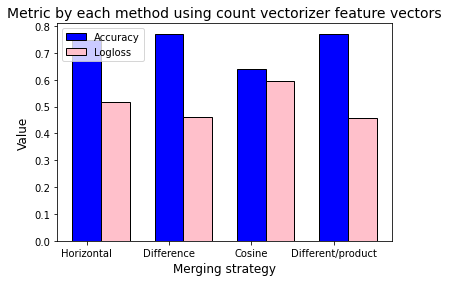

In [6]:
Metrics=['Accuracy','Logloss']
pos = np.arange(len(merging))
bar_width = 0.35
 
plt.bar(pos,accuracy,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,logloss,bar_width,color='pink',edgecolor='black')
plt.xticks(pos, merging)
plt.xlabel('Merging strategy', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Metric by each method using count vectorizer feature vectors',fontsize=14)
plt.legend(Metrics,loc=2)
plt.show()

We can see that the method that give better results in terms of accuracy and logloss is the last one, achieving an accuracy of 0.77 and a logloss of 0.46, is the absolute difference of feature vectors.

We try the same implementations using the TF-IDF feature vectors:

*TF-IDF*

In [9]:
accuracy = []
logloss = []
merging = ['Horizontal', 'Difference', 'Cosine', 'Different/product']

#Horizontal stack
features_val = stack_features(q1_val_tfidf, q2_val_tfidf)
model = joblib.load('./models/log_tfidf_stack.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

#Difference of features
features_val = difference(q1_val_tfidf, q2_val_tfidf)
model = joblib.load('./models/log_tfidf_dif.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

#Cosine similarity
features_val = similarity(q1_val_tfidf, q2_val_tfidf)
model = joblib.load('./models/log_tfidf_sim.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

#Different/product of features
features_val = different_product(q1_val_tfidf, q2_val_tfidf)
model = joblib.load('./models/log_tfidf_difprod.pkl')
accuracy.append((val_df['is_duplicate'].values == model.predict(features_val)).mean())
logloss.append(sklearn.metrics.log_loss(val_df['is_duplicate'].values, model.predict_proba(features_val)))

C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or inval

In [10]:
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Horizontal logloss: " + str(logloss[0]))
print("Horizontal accuracy: " + str(accuracy[0]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Difference logloss: " + str(logloss[1]))
print("Difference accuracy: " + str(accuracy[1]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Cosine logloss: " + str(logloss[2]))
print("Cosine accuracy: " + str(accuracy[2]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Different/Product logloss: " + str(logloss[3]))
print("Different/Product accuracy: " + str(accuracy[3]))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Horizontal logloss: 0.6723110022656916
Horizontal accuracy: 0.724598060274686
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Difference logloss: 0.48640039578895083
Difference accuracy: 0.7777126863242856
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Cosine logloss: 0.5805705852543142
Cosine accuracy: 0.6506541691075962
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Different/Product logloss: 0.7133509370738693
Different/Product accuracy: 0.7513506476599623
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


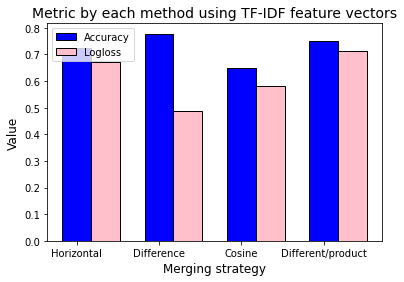

In [11]:
Metrics=['Accuracy','Logloss']
pos = np.arange(len(merging))
bar_width = 0.35
 
plt.bar(pos,accuracy,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,logloss,bar_width,color='pink',edgecolor='black')
plt.xticks(pos, merging)
plt.xlabel('Merging strategy', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Metric by each method using TF-IDF feature vectors',fontsize=14)
plt.legend(Metrics,loc=2)
plt.show()

Using these feature vectors we get a bit better results in terms of accuracy, achieving for the absolute difference of feature vectors approach an accuracy of 0.78 and logloss of 0.49.

After seeing that both feature vectors give similar results but that the better approach is to get the absolute difference of feature vectors of both questions, we will try to use both feature vectors and also introduce cosine similarity distance.

*Count vectorizer + TF-IDF + Cosine Similarity*

In [12]:
features_train = scipy.sparse.hstack((difference(q1_train_count, q2_train_count),
                                      difference(q1_train_tfidf, q2_train_tfidf),
                                      similarity(q1_train_count, q2_train_count),
                                      similarity(q1_train_tfidf, q2_train_tfidf)))
features_val = scipy.sparse.hstack((difference(q1_val_count, q2_val_count),
                                    difference(q1_val_tfidf, q2_val_tfidf),
                                    similarity(q1_val_count, q2_val_count),
                                    similarity(q1_val_tfidf, q2_val_tfidf)))

logistic = joblib.load('./models/log_CV_tfidf_mix.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))

logloss validation: 0.4782245286309448
Accuracy validation: 0.782464362429213


C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


This model using both feature vectors and cosine similarity as inputs improve a bit the accuracy respect to previous ones.

In [13]:
mistake_indices, predictions = get_mistakes(logistic, features_val, val_df['is_duplicate'].values)
print_mistake_k(10, val_df, mistake_indices, predictions)

What is the best age for having first sex?
When is the best age to have sex?
true class: 1
prediction: 0


After seeing that our model fails prediction similar questions that use words with the same meaning but written different, we also try to add lemmatization and stemming to the previous model in order to try to solve this problem.

*Lemmatization*

In [14]:
features_train = scipy.sparse.hstack((difference(q1_train_count_lem, q2_train_count_lem),
                                      difference(q1_train_tfidf_lem, q2_train_tfidf_lem),
                                      similarity(q1_train_count_lem, q2_train_count_lem),
                                      similarity(q1_train_tfidf_lem, q2_train_tfidf_lem)))
features_val = scipy.sparse.hstack((difference(q1_val_count_lem, q2_val_count_lem),
                                    difference(q1_val_tfidf_lem, q2_val_tfidf_lem),
                                    similarity(q1_val_count_lem, q2_val_count_lem),
                                    similarity(q1_val_tfidf_lem, q2_val_tfidf_lem)))


logistic = joblib.load('./models/log_CV_tfidf_mix_lem.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))

logloss validation: 0.47654072573649153
Accuracy validation: 0.7740024734752327


C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


*Stemming*

In [15]:
features_train = scipy.sparse.hstack((different_product(q1_train_count_stem, q2_train_count_stem),
                                      different_product(q1_train_tfidf_stem, q2_train_tfidf_stem),
                                      similarity(q1_train_count_stem, q2_train_count_stem),
                                      similarity(q1_train_tfidf_stem, q2_train_tfidf_stem)))
features_val = scipy.sparse.hstack((different_product(q1_val_count_stem, q2_val_count_stem),
                                    different_product(q1_val_tfidf_stem, q2_val_tfidf_stem),
                                    similarity(q1_val_count_stem, q2_val_count_stem),
                                    similarity(q1_val_tfidf_stem, q2_val_tfidf_stem)))

logistic = joblib.load('./models/log_CV_tfidf_mix_stem.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val)).mean()))

logloss validation: 0.530299058365541
Accuracy validation: 0.761635097311723


C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


We can see that neither lemmatization or stemming improve the results, so we will not use them.

## Extra features

As a final step, we will try to add extra features previously computed to see if they can add valuable information to the model.

In [16]:
Variable_X_train = Variable_KeyWords(train_df)
features_train_2 = scipy.sparse.hstack((difference(q1_train_count, q2_train_count),
                                      difference(q1_train_tfidf, q2_train_tfidf),
                                      similarity(q1_train_count, q2_train_count),
                                      similarity(q1_train_tfidf, q2_train_tfidf),
                                      np.hstack([extra_features_train, Variable_X_train])))

Variable_X_val = Variable_KeyWords(val_df)
features_val_2 = scipy.sparse.hstack((difference(q1_val_count, q2_val_count),
                                    difference(q1_val_tfidf, q2_val_tfidf),
                                    similarity(q1_val_count, q2_val_count),
                                    similarity(q1_val_tfidf, q2_val_tfidf),
                                    np.hstack([extra_features_val, Variable_X_val])))

logistic = joblib.load('./models/log_CV_tfidf_extra_mix.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic.predict_proba(features_val_2))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic.predict(features_val_2)).mean()))

logloss validation: 0.4567309766744149
Accuracy validation: 0.7912517086506542


C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


The extra features improve a little bit the results so we will keep this feature combination for the models.

## Exploring other models

Finally, instead of only using logistic regression as a model, we tried xgboost too. We implemented a Grid Search for the parameters obtaining as the best model the following one.

In [17]:
best_xgboost = joblib.load('./models/best_model.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            best_xgboost.predict_proba(features_val_2))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == best_xgboost.predict(features_val_2)).mean()))

logloss validation: 0.3869561994078014
Accuracy validation: 0.8098678643494109


As we can see the best xgboost model has a better performance than the logistic one in the evaluation set so we will keep this one as our final model using the previously mentioned features.

*Logistic with L1*

In [18]:
logistic_l1 = joblib.load('./models/logistic_l1.pkl')
print('logloss validation: ' + str(sklearn.metrics.log_loss(val_df['is_duplicate'].values,
                                                            logistic_l1.predict_proba(features_val_2))))
print('Accuracy validation: ' + str((val_df['is_duplicate'].values == logistic_l1.predict(features_val_2)).mean()))

logloss validation: 0.44647572263781243
Accuracy validation: 0.7896895137668424


C:\Users\Enric\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


We see that changing to the l1 does not improve our results (we had 0.7912)

## Final model used on test set

Once we have selected the best method with its pertinent features, we will evaluate the model using the train and validation dataset for training and test to evaluate it. The trained model is the following one and achieve the following results:

In [19]:
FinalModel = joblib.load('./models/final_model.pkl')
final_features_train = scipy.sparse.load_npz('./data/final_features_train.npz')
final_features_test = scipy.sparse.load_npz('./data/final_features_test.npz')

print('logloss validation: ' + str(sklearn.metrics.log_loss(test_df['is_duplicate'].values,
                                                            FinalModel.predict_proba(final_features_test))))
print('Accuracy validation: ' + str((test_df['is_duplicate'].values == FinalModel.predict(final_features_test)).mean()))

logloss validation: 0.3820196153925488
Accuracy validation: 0.8136284936928023


We can check the that we have a logloss of $0.382$ and an accuracy of $0.813$ in the test data. It is a considerable improvement respect the initial model that used only count vectorize feature vectors and an horizontal stack as the merging approach between both questions, which had an accuracy of $0.74$ and a logloss of $0.52$.

Finally we will show some mistakes of the final model and the auc-roc curve.

In [20]:
mistake_indices, predictions = get_mistakes(FinalModel, final_features_test, test_df['is_duplicate'].values)
print_mistake_k(10, test_df, mistake_indices, predictions)
print_mistake_k(9, test_df, mistake_indices, predictions)
print_mistake_k(8, test_df, mistake_indices, predictions)
print_mistake_k(7, test_df, mistake_indices, predictions)

Can I have java 6 and java 8 on the same machine and switch between them?
How do I run java 6 & java 8 on the same Machine (Mac)? I want java 8 by default, but at times I will need java 6?
true class: 1
prediction: 0
Who did Negan kill with Lucille in The Walking Dead season 6 finale cliffhanger?
[SPOILER] In The Walking Dead Season 6 Finale, who did Negan kill?
true class: 1
prediction: 0
How do spiders sleep?
Do spiders sleep?
true class: 0
prediction: 1
How would an MMA fighter fare against a Spartan soldier in hand to hand combat?
How well would a Spartan warrior fare against a MMA UFC undefeated champion in hand to hand combat?
true class: 1
prediction: 0


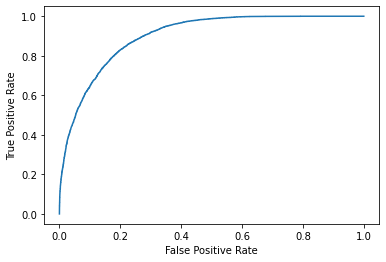

AUC: 0.8995489030628392


In [21]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_df['is_duplicate'].values,  FinalModel.predict_proba(final_features_test)[:, 1])

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC: ' + str(sklearn.metrics.roc_auc_score(test_df['is_duplicate'].values, FinalModel.predict_proba(final_features_test)[:, 1])))

The final model achieves an area under the curve of 0.899, which is a decent result.